# Time Series

This is a notebook to attempt my Time Series Model

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import os
%pylab inline
from pylab import rcParams
rcParams['figure.figsize'] = 22,10
from sklearn.preprocessing import LabelEncoder
import datetime

#SERIE AND ARIMA MODEL LIBRARIES
from pandas import Series
from pandas.plotting import autocorrelation_plot
import statsmodels.api as sm
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.arima_model import ARIMAResults
from sklearn.metrics import mean_squared_error, accuracy_score
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import warnings
import itertools
warnings.filterwarnings("ignore") # specify to ignore warning messages

Populating the interactive namespace from numpy and matplotlib


In [2]:
df = pd.read_csv("total-air-cargo-direct-transhipment-in-tonnes-monthly.csv")
df

,Data Series,2021 Nov,2021 Oct,2021 Sep,2021 Aug,2021 Jul,2021 Jun,2021 May,2021 Apr,2021 Mar,...,2000 Oct,2000 Sep,2000 Aug,2000 Jul,2000 Jun,2000 May,2000 Apr,2000 Mar,2000 Feb,2000 Jan
0,Total Direct Tonnage,"117,170.00","120,489.00","109,823.00","105,939.00","106,251.00","108,879.00","107,435.00","107,147.00","110,311.00",...,"100,633.00","101,143.00","98,894.00","101,048.00","96,219.00","93,726.00","92,089.00","100,229.00","80,781.00","84,064.00"
1,Imports,"61,483.00","62,880.00","58,129.00","57,082.00","58,203.00","58,293.00","57,480.00","56,635.00","59,291.00",...,"51,037.00","50,083.00","49,083.00","53,129.00","48,808.00","47,472.00","45,351.00","48,972.00","41,372.00","43,925.00"
2,Exports,"55,687.00","57,609.00","51,695.00","48,857.00","48,047.00","50,587.00","49,954.00","50,512.00","51,020.00",...,"49,596.00","51,060.00","49,811.00","47,918.00","47,411.00","46,254.00","46,737.00","51,257.00","39,408.00","40,139.00"
3,Total Transhipment Tonnage,"60,246.00","61,546.00","61,479.00","59,536.00","57,300.00","52,080.00","52,292.00","47,993.00","47,076.00",...,"49,279.00","47,221.00","45,882.00","45,640.00","43,871.00","43,939.00","45,377.00","46,955.00","41,488.00","36,810.00"
4,Imports,"29,964.00","30,479.00","30,553.00","29,692.00","28,492.00","26,111.00","25,924.00","23,747.00","23,275.00",...,"24,325.00","23,268.00","22,807.00","23,336.00","21,894.00","21,772.00","22,392.00","23,293.00","20,612.00","18,343.00"
5,Exports,"30,283.00","31,067.00","30,926.00","29,844.00","28,808.00","25,969.00","26,369.00","24,247.00","23,802.00",...,"24,954.00","23,953.00","23,075.00","22,304.00","21,977.00","22,168.00","22,985.00","23,662.00","20,876.00","18,466.00"


In [3]:
df= df.drop([0, 3])
df

,Data Series,2021 Nov,2021 Oct,2021 Sep,2021 Aug,2021 Jul,2021 Jun,2021 May,2021 Apr,2021 Mar,...,2000 Oct,2000 Sep,2000 Aug,2000 Jul,2000 Jun,2000 May,2000 Apr,2000 Mar,2000 Feb,2000 Jan
1,Imports,"61,483.00","62,880.00","58,129.00","57,082.00","58,203.00","58,293.00","57,480.00","56,635.00","59,291.00",...,"51,037.00","50,083.00","49,083.00","53,129.00","48,808.00","47,472.00","45,351.00","48,972.00","41,372.00","43,925.00"
2,Exports,"55,687.00","57,609.00","51,695.00","48,857.00","48,047.00","50,587.00","49,954.00","50,512.00","51,020.00",...,"49,596.00","51,060.00","49,811.00","47,918.00","47,411.00","46,254.00","46,737.00","51,257.00","39,408.00","40,139.00"
4,Imports,"29,964.00","30,479.00","30,553.00","29,692.00","28,492.00","26,111.00","25,924.00","23,747.00","23,275.00",...,"24,325.00","23,268.00","22,807.00","23,336.00","21,894.00","21,772.00","22,392.00","23,293.00","20,612.00","18,343.00"
5,Exports,"30,283.00","31,067.00","30,926.00","29,844.00","28,808.00","25,969.00","26,369.00","24,247.00","23,802.00",...,"24,954.00","23,953.00","23,075.00","22,304.00","21,977.00","22,168.00","22,985.00","23,662.00","20,876.00","18,466.00"


In [4]:
df= df.drop(['Data Series'], axis=1)
df=df.rename(index={1: "D.Imports", 2: "D.Exports", 4: "T.Imports", 5: "T.Exports"})
df=df.T
print(df.info())
df

<class 'pandas.core.frame.DataFrame'>
Index: 263 entries, 2021 Nov to 2000 Jan
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   D.Imports  263 non-null    object
 1   D.Exports  263 non-null    object
 2   T.Imports  263 non-null    object
 3   T.Exports  263 non-null    object
dtypes: object(4)
memory usage: 10.3+ KB
None


,D.Imports,D.Exports,T.Imports,T.Exports
2021 Nov,"61,483.00","55,687.00","29,964.00","30,283.00"
2021 Oct,"62,880.00","57,609.00","30,479.00","31,067.00"
2021 Sep,"58,129.00","51,695.00","30,553.00","30,926.00"
2021 Aug,"57,082.00","48,857.00","29,692.00","29,844.00"
2021 Jul,"58,203.00","48,047.00","28,492.00","28,808.00"
...,...,...,...,...
2000 May,"47,472.00","46,254.00","21,772.00","22,168.00"
2000 Apr,"45,351.00","46,737.00","22,392.00","22,985.00"
2000 Mar,"48,972.00","51,257.00","23,293.00","23,662.00"
2000 Feb,"41,372.00","39,408.00","20,612.00","20,876.00"


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 263 entries, 2021 Nov to 2000 Jan
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   D.Imports  263 non-null    object
 1   D.Exports  263 non-null    object
 2   T.Imports  263 non-null    object
 3   T.Exports  263 non-null    object
dtypes: object(4)
memory usage: 10.3+ KB


In [6]:
df.index = pd.to_datetime(df.index, format='%Y %b')
df

,D.Imports,D.Exports,T.Imports,T.Exports
2021-11-01,"61,483.00","55,687.00","29,964.00","30,283.00"
2021-10-01,"62,880.00","57,609.00","30,479.00","31,067.00"
2021-09-01,"58,129.00","51,695.00","30,553.00","30,926.00"
2021-08-01,"57,082.00","48,857.00","29,692.00","29,844.00"
2021-07-01,"58,203.00","48,047.00","28,492.00","28,808.00"
...,...,...,...,...
2000-05-01,"47,472.00","46,254.00","21,772.00","22,168.00"
2000-04-01,"45,351.00","46,737.00","22,392.00","22,985.00"
2000-03-01,"48,972.00","51,257.00","23,293.00","23,662.00"
2000-02-01,"41,372.00","39,408.00","20,612.00","20,876.00"


In [7]:
df = df.sort_index()
df

,D.Imports,D.Exports,T.Imports,T.Exports
2000-01-01,"43,925.00","40,139.00","18,343.00","18,466.00"
2000-02-01,"41,372.00","39,408.00","20,612.00","20,876.00"
2000-03-01,"48,972.00","51,257.00","23,293.00","23,662.00"
2000-04-01,"45,351.00","46,737.00","22,392.00","22,985.00"
2000-05-01,"47,472.00","46,254.00","21,772.00","22,168.00"
...,...,...,...,...
2021-07-01,"58,203.00","48,047.00","28,492.00","28,808.00"
2021-08-01,"57,082.00","48,857.00","29,692.00","29,844.00"
2021-09-01,"58,129.00","51,695.00","30,553.00","30,926.00"
2021-10-01,"62,880.00","57,609.00","30,479.00","31,067.00"


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 263 entries, 2000-01-01 to 2021-11-01
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   D.Imports  263 non-null    object
 1   D.Exports  263 non-null    object
 2   T.Imports  263 non-null    object
 3   T.Exports  263 non-null    object
dtypes: object(4)
memory usage: 10.3+ KB


In [9]:
df.replace(',','', regex=True, inplace=True)
df[['D.Imports','D.Exports','T.Imports','T.Exports']]=df[['D.Imports','D.Exports','T.Imports','T.Exports']].astype(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 263 entries, 2000-01-01 to 2021-11-01
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   D.Imports  263 non-null    float64
 1   D.Exports  263 non-null    float64
 2   T.Imports  263 non-null    float64
 3   T.Exports  263 non-null    float64
dtypes: float64(4)
memory usage: 10.3 KB


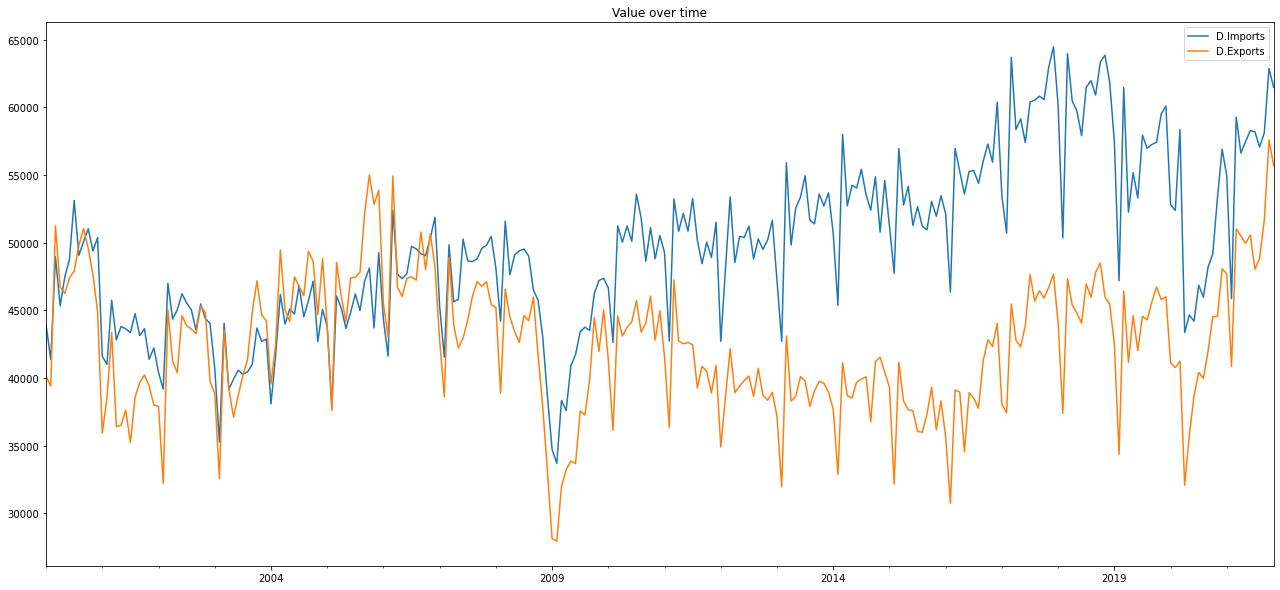

          D.Imports     D.Exports     T.Imports     T.Exports
count    263.000000    263.000000    263.000000    263.000000
mean   49751.406844  42490.794677  29683.224335  30004.832700
std     6269.750602   5018.287018   5304.343572   5306.916786
min    33702.000000  27957.000000   9855.000000  10532.000000
25%    45050.000000  38916.500000  26484.500000  26688.000000
50%    49541.000000  42647.000000  30176.000000  30750.000000
75%    53519.000000  46008.500000  33361.500000  33641.000000
max    64477.000000  57609.000000  41102.000000  40866.000000


In [53]:
df[['D.Imports', 'D.Exports']].plot(figsize=(22,10))
plt.title('Value over time')
plt.show()
print(df.describe())

### Plot pacf

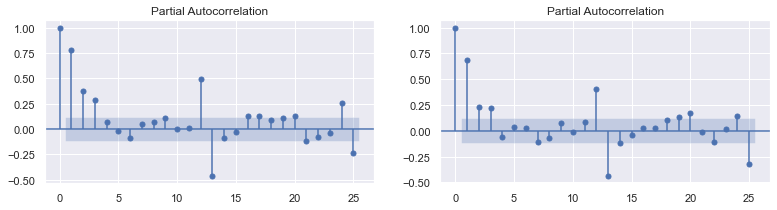

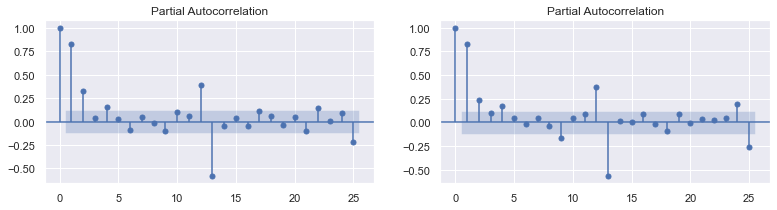

In [88]:
from statsmodels.graphics.tsaplots import plot_pacf
# background style
sns.set(style="darkgrid")

fig, axs = plt.subplots(1, 2, figsize=(13, 3))
plot_pacf(df['D.Imports'], ax=axs[0])
plot_pacf(df['D.Exports'], ax=axs[1])

fig, axs = plt.subplots(1, 2, figsize=(13, 3))
plot_pacf(df['T.Imports'], ax=axs[0])
plot_pacf(df['T.Exports'], ax=axs[1])

plt.show()

#### Testing for Stationality

From here we can see that the data is stationary

In [89]:
from statsmodels.tsa.stattools import adfuller
def test_adf(series, title=''):
    dfout={}
    dftest=sm.tsa.adfuller(series.dropna(), autolag='AIC', regression='ct')
    for key,val in dftest[4].items():
        dfout[f'critical value ({key})']=val
    if dftest[1]<=0.05:
        print(f'{title} p-value:{dftest[1]}, Reject Null Hypothesis')
        print("Data is Stationary for", title)
    else:
        print(f'{title} p-value:{dftest[1]}, Accept Null Hypothesis')
        print("Data is not Stationary for", title)

In [90]:
test_adf(df['D.Imports'], "D.Imports")
test_adf(df['D.Exports'], "D.Exports")
test_adf(df['T.Imports'], "T.Imports")
test_adf(df['T.Exports'], "T.Exports")

D.Imports p-value:0.002760671739006893, Reject Null Hypothesis
Data is Stationary for D.Imports
D.Exports p-value:0.28177389422901955, Accept Null Hypothesis
Data is not Stationary for D.Exports
T.Imports p-value:0.08891415846322848, Accept Null Hypothesis
Data is not Stationary for T.Imports
T.Exports p-value:0.060748055209646774, Accept Null Hypothesis
Data is not Stationary for T.Exports


In this test, the p-value is less than 0.05  for all except D.Exports. Therefore we
reject all the null hypothesis except for D.Exports. The time series is stationary for all except for D.Exports.

#### Checking Trends with Seasonal

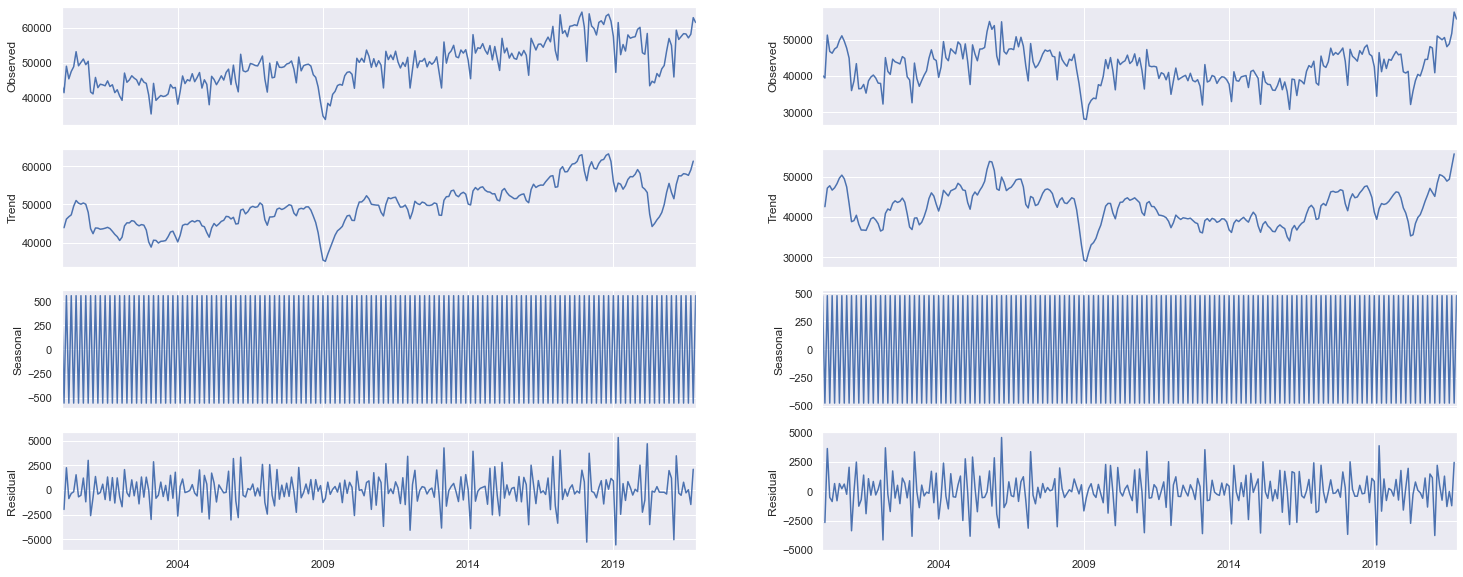

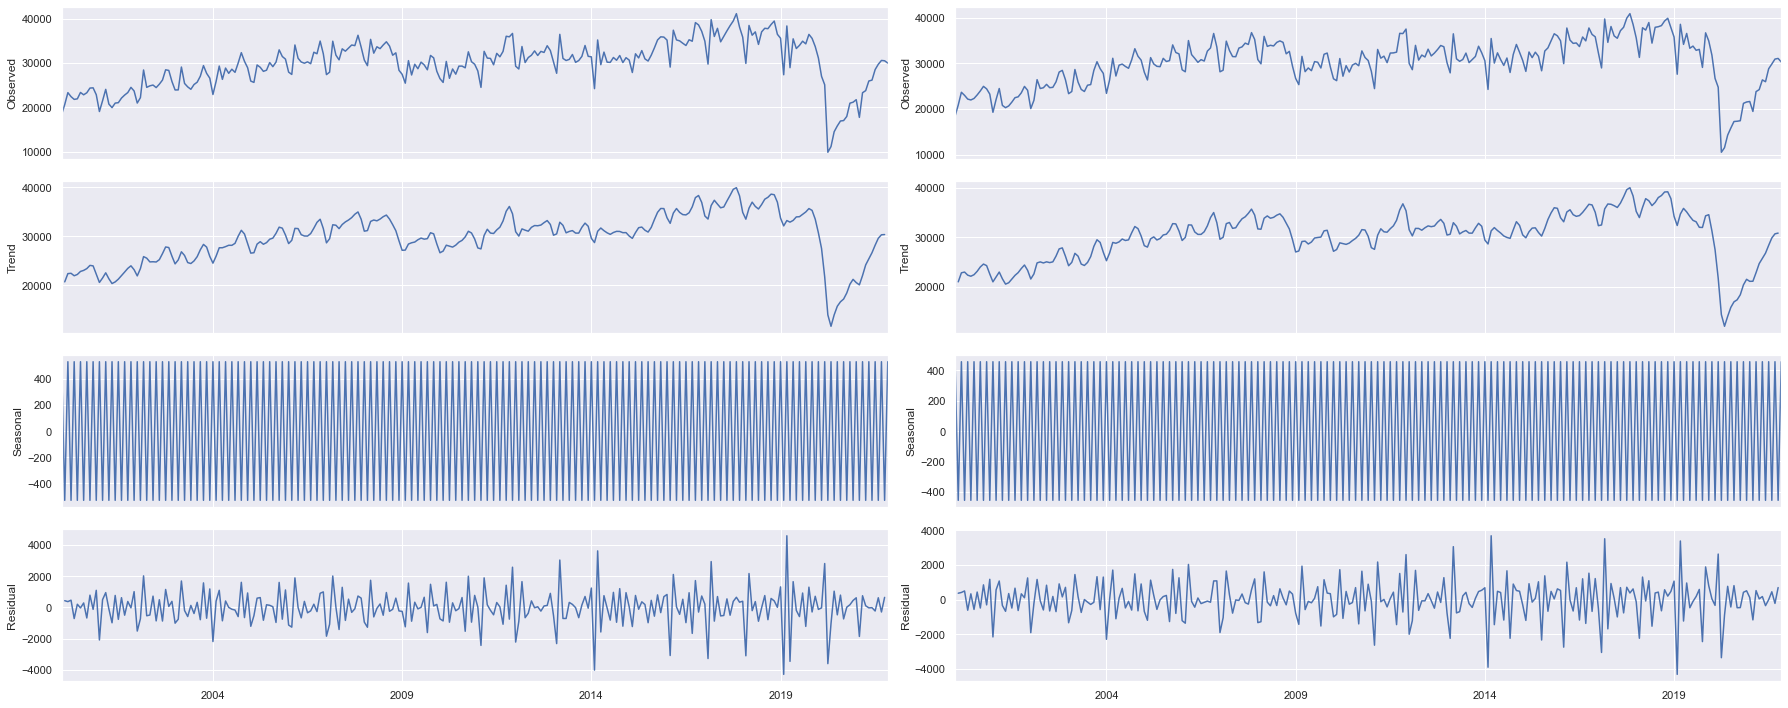

In [91]:
import matplotlib.pyplot as plt
import statsmodels.api as sm
res1 = sm.tsa.seasonal_decompose(df['D.Imports'], model ='addictive', freq=2)
res2 = sm.tsa.seasonal_decompose(df['D.Exports'], model ='addictive', freq=2)
res3 = sm.tsa.seasonal_decompose(df['T.Imports'], model ='addictive', freq=2)
res4 = sm.tsa.seasonal_decompose(df['T.Exports'], model ='addictive', freq=2)

def plotseasonal(res, axes ):
    res.observed.plot(ax=axes[0], legend=False)
    axes[0].set_ylabel('Observed')
    res.trend.plot(ax=axes[1], legend=False)
    axes[1].set_ylabel('Trend')
    res.seasonal.plot(ax=axes[2], legend=False)
    axes[2].set_ylabel('Seasonal')
    res.resid.plot(ax=axes[3], legend=False)
    axes[3].set_ylabel('Residual')

fig, axs = plt.subplots(ncols=2, nrows=4, sharex=True, figsize=(25,10))
plotseasonal(res1, axs[:,0])
plotseasonal(res2, axs[:,1])

fig, axs = plt.subplots(ncols=2, nrows=4, sharex=True, figsize=(25,10))
plotseasonal(res3, axs[:,0])
plotseasonal(res4, axs[:,1])

plt.tight_layout()
plt.show()

### Plot acf

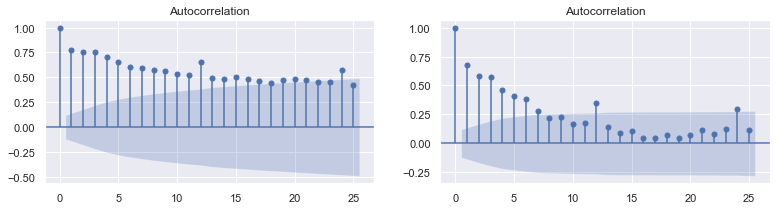

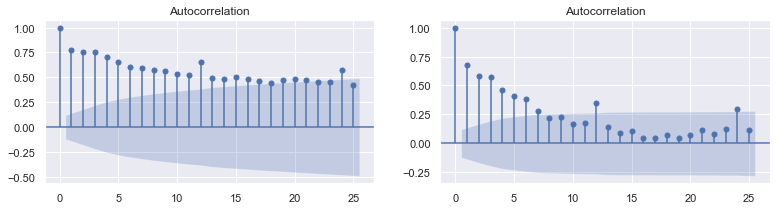

In [92]:
from statsmodels.graphics.tsaplots import plot_acf
# background style
sns.set(style="darkgrid")

fig, axs = plt.subplots(1, 2, figsize=(13, 3))
plot_acf(df['D.Imports'], ax=axs[0])
plot_acf(df['D.Exports'], ax=axs[1])

fig, axs = plt.subplots(1, 2, figsize=(13, 3))
plot_acf(df['D.Imports'], ax=axs[0])
plot_acf(df['D.Exports'], ax=axs[1])

plt.show()

D.Exports p-value before differencing: 0.070320
D.Exports p-value after 1st order differencing: 0.002286
D.Exports p-value after 2nd order differencing: 0.000000


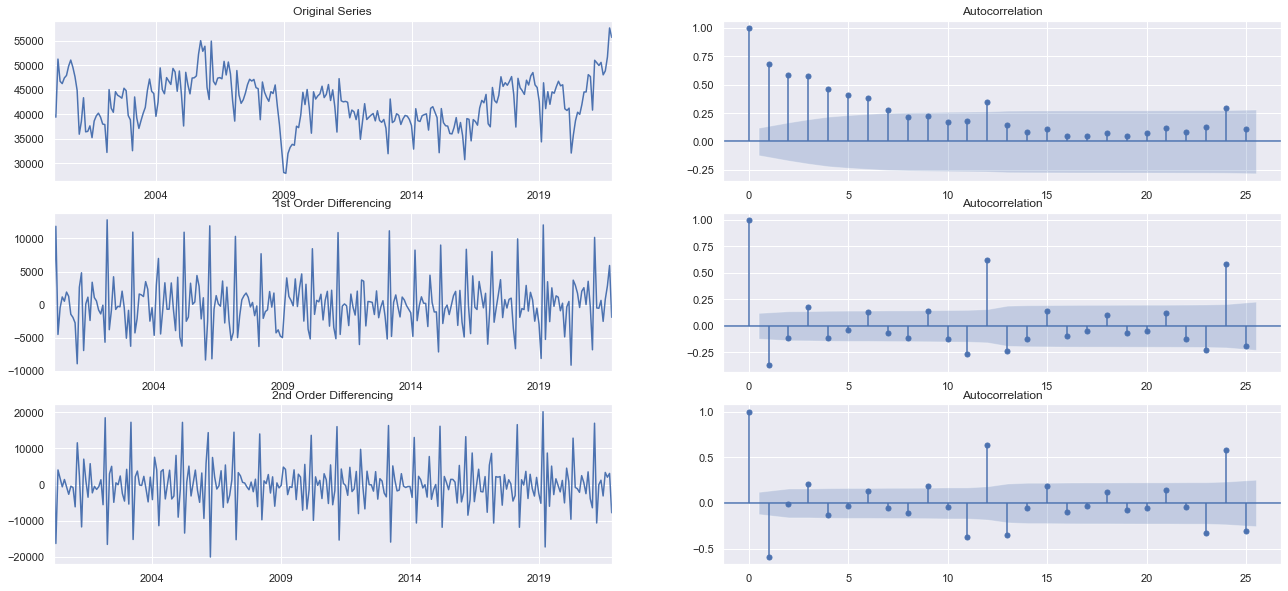

In [93]:
from statsmodels.tsa.statespace.tools import diff
from statsmodels.graphics.tsaplots import plot_acf
# Original Series
fig, axes = plt.subplots(3, 2)
data=df['D.Exports']
data1=diff(df['D.Exports'])
data2=diff(diff(df['D.Exports']))
data.plot(ax=axes[0, 0]); axes[0, 0].set_title('Original Series')
plot_acf(data, ax=axes[0, 1])
result = adfuller(data)
result1 = adfuller(data1)
result2 = adfuller(data2)
print('D.Exports p-value before differencing: %f' %result[1])
print('D.Exports p-value after 1st order differencing: %f' %result1[1])
print('D.Exports p-value after 2nd order differencing: %f' %result2[1])

# 1st Differencing
data1.plot(ax=axes[1, 0]); axes[1, 0].set_title('1st Order Differencing')
plot_acf(data1, ax=axes[1, 1])

# 2nd Differencing
data2.plot(ax=axes[2, 0]); axes[2, 0].set_title('2nd Order Differencing')
plot_acf(data2, ax=axes[2, 1])

plt.show()

### Arima

In [10]:
train=df.iloc[:-71]
test=df.iloc[-71:]

In [11]:
train

,D.Imports,D.Exports,T.Imports,T.Exports
2000-01-01,43925.0,40139.0,18343.0,18466.0
2000-02-01,41372.0,39408.0,20612.0,20876.0
2000-03-01,48972.0,51257.0,23293.0,23662.0
2000-04-01,45351.0,46737.0,22392.0,22985.0
2000-05-01,47472.0,46254.0,21772.0,22168.0
...,...,...,...,...
2015-08-01,51220.0,35994.0,31750.0,32684.0
2015-09-01,50960.0,37329.0,33392.0,33377.0
2015-10-01,53054.0,39326.0,35172.0,34943.0
2015-11-01,51960.0,36177.0,35879.0,36466.0


In [12]:
test

,D.Imports,D.Exports,T.Imports,T.Exports
2016-01-01,52130.0,35652.0,35142.0,34934.0
2016-02-01,46369.0,30747.0,29052.0,29928.0
2016-03-01,56971.0,39115.0,37375.0,37722.0
2016-04-01,55307.0,38968.0,35179.0,35077.0
2016-05-01,53612.0,34570.0,34969.0,34361.0
...,...,...,...,...
2021-07-01,58203.0,48047.0,28492.0,28808.0
2021-08-01,57082.0,48857.0,29692.0,29844.0
2021-09-01,58129.0,51695.0,30553.0,30926.0
2021-10-01,62880.0,57609.0,30479.0,31067.0


### Find the best combinations of the parameters for arima model

In [95]:
# Define the p, d and q parameters to take any value between 0 and 3 (exclusive)
p = (0, 1, 2, 3, 4, 5)
d = (0, 1, 2)
q = (0, 1, 2, 3, 4, 5)
# Generate all different combinations of p, q and q triplets
orders = list(itertools.product(p, d, q))
print(orders)

[(0, 0, 0), (0, 0, 1), (0, 0, 2), (0, 0, 3), (0, 0, 4), (0, 0, 5), (0, 1, 0), (0, 1, 1), (0, 1, 2), (0, 1, 3), (0, 1, 4), (0, 1, 5), (0, 2, 0), (0, 2, 1), (0, 2, 2), (0, 2, 3), (0, 2, 4), (0, 2, 5), (1, 0, 0), (1, 0, 1), (1, 0, 2), (1, 0, 3), (1, 0, 4), (1, 0, 5), (1, 1, 0), (1, 1, 1), (1, 1, 2), (1, 1, 3), (1, 1, 4), (1, 1, 5), (1, 2, 0), (1, 2, 1), (1, 2, 2), (1, 2, 3), (1, 2, 4), (1, 2, 5), (2, 0, 0), (2, 0, 1), (2, 0, 2), (2, 0, 3), (2, 0, 4), (2, 0, 5), (2, 1, 0), (2, 1, 1), (2, 1, 2), (2, 1, 3), (2, 1, 4), (2, 1, 5), (2, 2, 0), (2, 2, 1), (2, 2, 2), (2, 2, 3), (2, 2, 4), (2, 2, 5), (3, 0, 0), (3, 0, 1), (3, 0, 2), (3, 0, 3), (3, 0, 4), (3, 0, 5), (3, 1, 0), (3, 1, 1), (3, 1, 2), (3, 1, 3), (3, 1, 4), (3, 1, 5), (3, 2, 0), (3, 2, 1), (3, 2, 2), (3, 2, 3), (3, 2, 4), (3, 2, 5), (4, 0, 0), (4, 0, 1), (4, 0, 2), (4, 0, 3), (4, 0, 4), (4, 0, 5), (4, 1, 0), (4, 1, 1), (4, 1, 2), (4, 1, 3), (4, 1, 4), (4, 1, 5), (4, 2, 0), (4, 2, 1), (4, 2, 2), (4, 2, 3), (4, 2, 4), (4, 2, 5), (5, 0, 0)

In [96]:
types=['D.Imports','D.Exports','T.Imports','T.Exports']

In [97]:
prediction_df = pd.DataFrame()
metrics_df = pd.DataFrame(columns=['Type', 'Model', 'Mape_train', 'Mape_test', 'AIC', 'RMSE', 'ME', 'MAE'])
warnings.filterwarnings("ignore")
for type in types:
        for order in orders:
            try:
                #ARIMA model
                model = ARIMA(train[type], order=order)  
                fitted = model.fit()

                # Forecast
                fc1, se1, conf1 = fitted.forecast(192, alpha=0.05)
                fc2, se2, conf2 = fitted.forecast(71, alpha=0.05)  # 95% conf

                # Make as pandas series
                fc_series = pd.Series(fc2, index=test[type].index)
                lower_series = pd.Series(conf2[:, 0], index=test[type].index)
                upper_series = pd.Series(conf2[:, 1], index=test[type].index)
                mape_train= round(np.mean(np.abs(fc1 - train[type].values)/np.abs(train[type].values)*100), 2)  # MAPE_train
                mape_test= round(np.mean(np.abs(fc2 - test[type].values)/np.abs(test[type].values)*100), 2)  # MAPE_test
                me= round(np.mean(fc2 - test[type].values),2)             # ME
                mae= round(np.mean(np.abs(fc2 - test[type].values)),2)    # MAE
                rmse= round(np.mean((fc2 - test[type].values)**2)**.5,2)  # RMSE
                metrics_df =metrics_df.append({'Type': type,'Model': f'{order}', 'Mape_train':mape_train, 'Mape_test':mape_test, 'AIC':fitted.aic, 'RMSE':rmse, 'ME':me, 'MAE': mae, },ignore_index=True)
            except:
                pass
                # ignore the error and go on
        print('For Type:', type)
        display(metrics_df.loc[metrics_df['Type'] == type].sort_values('RMSE'))

For Type: D.Imports


,Type,Model,Mape_train,Mape_test,AIC,RMSE,ME,MAE
6,D.Imports,"(0, 1, 0)",24.16,8.37,3674.500348,5616.04,-1061.83,4575.32
29,D.Imports,"(1, 1, 5)",20.83,8.67,3600.980800,5683.44,-1887.31,4819.73
46,D.Imports,"(2, 1, 5)",24.33,8.50,3609.512049,5690.23,-1308.75,4670.34
9,D.Imports,"(0, 1, 3)",23.37,8.60,3614.722690,5711.47,-1484.60,4738.80
24,D.Imports,"(1, 1, 0)",23.50,8.61,3630.158037,5719.05,-1469.11,4742.08
...,...,...,...,...,...,...,...,...
78,D.Imports,"(4, 2, 0)",51.63,17.37,3637.937398,12098.30,8668.97,9108.56
30,D.Imports,"(1, 2, 0)",47.77,19.57,3760.432470,13329.12,10047.35,10314.57
64,D.Imports,"(3, 2, 0)",93.57,28.97,3658.720562,19332.73,15364.06,15490.33
47,D.Imports,"(2, 2, 0)",104.19,32.02,3683.802961,21249.77,17086.12,17168.52


For Type: D.Exports


,Type,Model,Mape_train,Mape_test,AIC,RMSE,ME,MAE
181,D.Exports,"(5, 1, 5)",39.10,8.03,3616.313047,4442.15,421.65,3348.38
180,D.Exports,"(5, 1, 4)",27.00,8.41,3613.616068,4482.73,-1685.33,3672.79
176,D.Exports,"(5, 0, 5)",9.71,8.57,3628.518018,4937.01,-2376.01,3848.30
174,D.Exports,"(5, 0, 2)",9.85,8.93,3667.117321,5010.03,-2096.68,3984.21
175,D.Exports,"(5, 0, 3)",9.83,8.98,3650.574538,5024.98,-2157.14,4006.25
...,...,...,...,...,...,...,...,...
184,D.Exports,"(5, 2, 2)",75.97,30.79,3660.713052,16167.92,-13752.13,14048.38
171,D.Exports,"(4, 2, 2)",83.19,36.49,3651.987438,18806.42,-16311.57,16576.19
140,D.Exports,"(2, 2, 0)",223.53,33.30,3724.985958,19598.22,-14924.51,15317.80
123,D.Exports,"(1, 2, 0)",289.02,40.77,3797.383927,24056.08,-18341.18,18700.89


For Type: T.Imports


,Type,Model,Mape_train,Mape_test,AIC,RMSE,ME,MAE
216,T.Imports,"(1, 2, 0)",177.82,20.09,3640.359504,6080.85,1945.87,4115.24
246,T.Imports,"(4, 0, 0)",15.51,23.54,3524.095833,6834.92,24.89,5356.83
259,T.Imports,"(5, 0, 0)",15.99,23.74,3521.950072,6910.49,667.64,5226.63
235,T.Imports,"(3, 0, 0)",14.05,24.35,3537.335657,7139.68,-1150.01,5900.75
205,T.Imports,"(1, 0, 1)",16.03,24.88,3520.135654,7198.80,1201.00,5381.12
...,...,...,...,...,...,...,...,...
269,T.Imports,"(5, 2, 3)",66.28,40.98,3492.665917,12286.97,6715.93,8518.32
231,T.Imports,"(2, 2, 0)",67.10,76.46,3613.174271,21442.33,17836.17,17836.17
242,T.Imports,"(3, 2, 0)",242.49,135.29,3580.063857,38718.96,32681.91,32681.91
254,T.Imports,"(4, 2, 0)",353.19,169.82,3554.752378,48975.92,41399.11,41399.11


For Type: T.Exports


,Type,Model,Mape_train,Mape_test,AIC,RMSE,ME,MAE
301,T.Exports,"(1, 2, 0)",174.62,20.77,3662.897766,6319.54,2637.29,4356.57
333,T.Exports,"(4, 0, 0)",15.26,22.75,3540.678080,6791.33,-16.57,5281.15
346,T.Exports,"(5, 0, 0)",15.82,22.84,3536.662277,6823.33,666.65,5117.67
290,T.Exports,"(1, 0, 1)",15.68,23.79,3540.403919,7090.92,1157.09,5231.66
318,T.Exports,"(3, 0, 0)",14.06,23.67,3553.221918,7094.15,-1001.84,5791.66
...,...,...,...,...,...,...,...,...
315,T.Exports,"(2, 2, 0)",77.81,86.05,3631.903887,24436.26,20670.40,20670.40
283,T.Exports,"(0, 2, 0)",426.85,92.03,3728.542649,30219.85,-24975.73,25137.55
329,T.Exports,"(3, 2, 0)",203.22,122.03,3600.780538,35233.56,29799.55,29799.55
355,T.Exports,"(5, 2, 0)",426.17,194.43,3564.903326,56940.31,48346.82,48346.82


### Print out the best arima models for each type of Import/Export

In [98]:
train_DImports=train['D.Imports']
test_DImports=test['D.Imports']
train_DExports=train['D.Exports']
test_DExports=test['D.Exports']
train_TImports=train['T.Imports']
test_TImports=test['T.Imports']
train_TExports=train['T.Exports']
test_TExports=test['T.Exports']

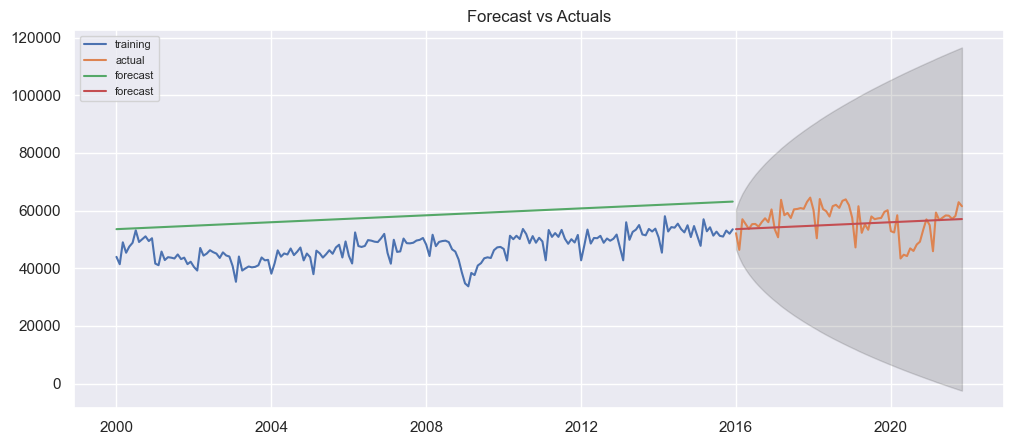

Train_MAPE= 24.16%
Test_MAPE= 8.37%
RMSE= 5616.04


In [100]:
# Build Model
# CO Gas
# ARIMA model order=(0, 0, 1))  
model = ARIMA(train_DImports, order=(0, 1, 0))  
fitted = model.fit(disp=-1)  

# Forecast
fc1, se1, conf1 = fitted.forecast(192, alpha=0.05)
fc2, se2, conf2 = fitted.forecast(71, alpha=0.05)  # 95% conf


# Make as pandas series
fc_series1 = pd.Series(fc1, index=train_DImports.index)
fc_series2 = pd.Series(fc2, index=test_DImports.index)
lower_series = pd.Series(conf2[:, 0], index=test_DImports.index)
upper_series = pd.Series(conf2[:, 1], index=test_DImports.index)

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train_DImports, label='training')
plt.plot(test_DImports, label='actual')
plt.plot(fc_series1, label='forecast')
plt.plot(fc_series2, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()
print(f'Train_MAPE= {round(np.mean(np.abs(fc1 - train_DImports.values)/np.abs(train_DImports.values)*100),2)}%')   # MAPE
print(f'Test_MAPE= {round(np.mean(np.abs(fc2 - test_DImports.values)/np.abs(test_DImports.values)*100),2)}%')
print('RMSE=',round(np.mean((fc2 - test_DImports.values)**2)**.5,2)) # RMSE

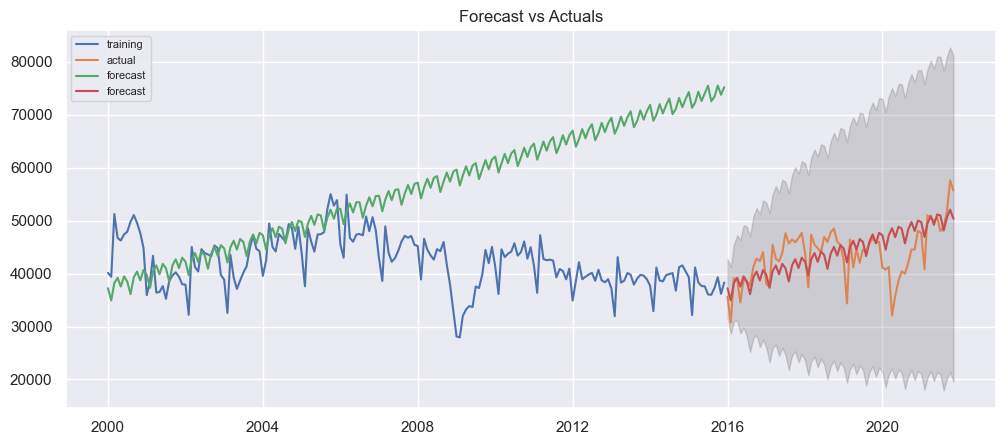

Train_MAPE= 39.1%
Test_MAPE= 8.03%
RMSE= 4442.15


In [105]:
# Build Model
# CO Gas
# ARIMA model order=(0, 0, 1))  
model = ARIMA(train_DExports, order=(5,1,5))  
fitted = model.fit(disp=-1)  

# Forecast
fc1, se1, conf1 = fitted.forecast(192, alpha=0.05)
fc2, se2, conf2 = fitted.forecast(71, alpha=0.05)  # 95% conf


# Make as pandas series
fc_series1 = pd.Series(fc1, index=train_DExports.index)
fc_series2 = pd.Series(fc2, index=test_DExports.index)
lower_series = pd.Series(conf2[:, 0], index=test_DExports.index)
upper_series = pd.Series(conf2[:, 1], index=test_DExports.index)

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train_DExports, label='training')
plt.plot(test_DExports, label='actual')
plt.plot(fc_series1, label='forecast')
plt.plot(fc_series2, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()
print(f'Train_MAPE= {round(np.mean(np.abs(fc1 - train_DExports.values)/np.abs(train_DExports.values)*100),2)}%')   # MAPE
print(f'Test_MAPE= {round(np.mean(np.abs(fc2 - test_DExports.values)/np.abs(test_DExports.values)*100),2)}%')
print('RMSE=',round(np.mean((fc2 - test_DExports.values)**2)**.5,2)) # RMSE

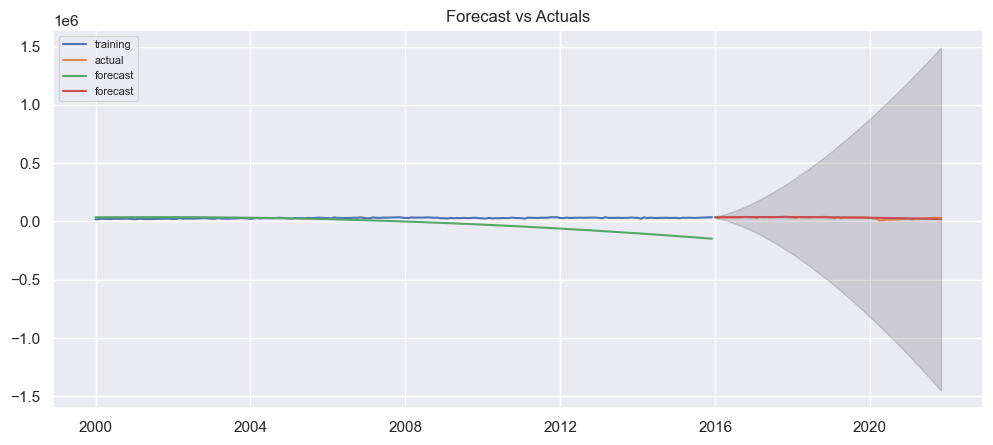

Train_MAPE= 177.82%
Test_MAPE= 20.09%
RMSE= 6080.85


In [102]:
# Build Model
# CO Gas
# ARIMA model order=(0, 0, 1))  
model = ARIMA(train_TImports, order=(1, 2, 0))  
fitted = model.fit(disp=-1)  

# Forecast
fc1, se1, conf1 = fitted.forecast(192, alpha=0.05)
fc2, se2, conf2 = fitted.forecast(71, alpha=0.05)  # 95% conf


# Make as pandas series
fc_series1 = pd.Series(fc1, index=train_TImports.index)
fc_series2 = pd.Series(fc2, index=test_TImports.index)
lower_series = pd.Series(conf2[:, 0], index=test_TImports.index)
upper_series = pd.Series(conf2[:, 1], index=test_TImports.index)

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train_TImports, label='training')
plt.plot(test_TImports, label='actual')
plt.plot(fc_series1, label='forecast')
plt.plot(fc_series2, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()
print(f'Train_MAPE= {round(np.mean(np.abs(fc1 - train_TImports.values)/np.abs(train_TImports.values)*100),2)}%')   # MAPE
print(f'Test_MAPE= {round(np.mean(np.abs(fc2 - test_TImports.values)/np.abs(test_TImports.values)*100),2)}%')
print('RMSE=',round(np.mean((fc2 - test_TImports.values)**2)**.5,2)) # RMSE

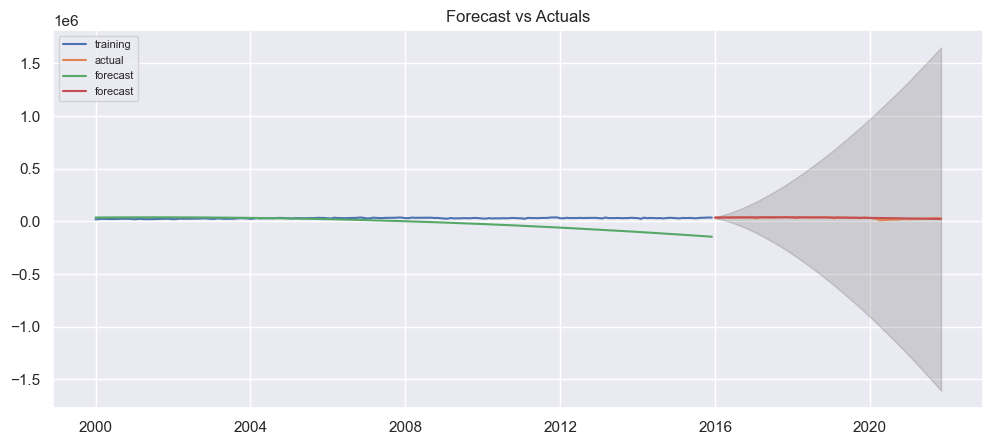

Train_MAPE= 174.62%
Test_MAPE= 20.77%
RMSE= 6319.54


In [104]:
# Build Model
# CO Gas
# ARIMA model order=(1, 2, 0))  
model = ARIMA(train_TExports, order=(1, 2, 0))  
fitted = model.fit(disp=-1)  

# Forecast
fc1, se1, conf1 = fitted.forecast(192, alpha=0.05)
fc2, se2, conf2 = fitted.forecast(71, alpha=0.05)  # 95% conf


# Make as pandas series
fc_series1 = pd.Series(fc1, index=train_TExports.index)
fc_series2 = pd.Series(fc2, index=test_TExports.index)
lower_series = pd.Series(conf2[:, 0], index=test_TExports.index)
upper_series = pd.Series(conf2[:, 1], index=test_TExports.index)

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train_TExports, label='training')
plt.plot(test_TExports, label='actual')
plt.plot(fc_series1, label='forecast')
plt.plot(fc_series2, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()
print(f'Train_MAPE= {round(np.mean(np.abs(fc1 - train_TExports.values)/np.abs(train_TExports.values)*100),2)}%')   # MAPE
print(f'Test_MAPE= {round(np.mean(np.abs(fc2 - test_TExports.values)/np.abs(test_TExports.values)*100),2)}%')
print('RMSE=',round(np.mean((fc2 - test_TExports.values)**2)**.5,2)) # RMSE

### Sarimax

In [12]:
# Define the p, d and q parameters to take any value between 0 and 3 (exclusive)
p = (0, 1, 2, 3)
d = (0, 1)
q = (0, 1, 2)
# Generate all different combinations of p, q and q triplets
orders = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, q and q triplets
# Note: here we have 12 in the 's' position as we have monthly data
# You'll want to change this according to your time series' frequency
seasonal_orders = [(1, 0, 0, 12),(3, 1, 3, 12)]
#seasonal_orders = [(x[0], x[1], x[2], 12) for x in orders]

In [16]:
def MAPE(y_actual, y_pred):
    y_actual = y_actual.values.reshape(-1,)
    y_pred = y_pred.values
    return np.mean(np.abs(np.divide((y_actual-y_pred), y_actual))* 100)

In [17]:
# Define the p, d and q parameters to take any value between 0 and 3 (exclusive)
p = (0, 1, 2, 3)
d = (0, 1)
q = (0, 1, 2, 3)
# Generate all different combinations of p, q and q triplets
orders = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, q and q triplets
# Note: here we have 12 in the 's' position as we have monthly data
# You'll want to change this according to your time series' frequency
seasonal_orders = [(1, 0, 0, 12),(3, 1, 3, 12),(1, 0, 0, 31),(1, 0, 1, 31)]
#seasonal_orders = [(x[0], x[1], x[2], 12) for x in orders]

In [18]:
types=['D.Imports','D.Exports','T.Imports','T.Exports']

In [19]:
# Sarimax model with grid search parameters
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_percentage_error
prediction_df = pd.DataFrame()
metrics_df = pd.DataFrame(columns=['Type', 'Model', 'Mape_train', 'Mape_test', 'AIC', 'RMSE'])
for type in types:
    for order in orders:
        for seasonal_order in seasonal_orders:
            try:
                    arima_model = SARIMAX(train[type], order=order,
                                         seasonal_order=seasonal_order).fit()
                    pred= arima_model.get_prediction(start='2000-01-01', end='2021-11-01').predicted_mean
                    prediction_df[f'{order}, {seasonal_order}'] = pred
                    rmse = round(np.sqrt(mean_squared_error(pred[pred.index>='2016-01-01'],test[type])),2)
                    mape_train =round(MAPE(train[type], pred[pred.index<'2016-01-01']),2)
                    mape_test =round(MAPE(test[type], pred[pred.index>='2016-01-01']),2)
                    metrics_df =metrics_df.append({'Type':type, 'Model': f'{order}, {seasonal_order}','Mape_train': mape_train, 'Mape_test':mape_test, 'AIC': arima_model.aic, 'RMSE':rmse},ignore_index=True)
            except:
                pass
                # ignore the error and go on
    print('For Type:', type)
    display(metrics_df.loc[metrics_df['Type'] == type].sort_values('RMSE'))

For Type: D.Imports


,Type,Model,Mape_train,Mape_test,AIC,RMSE
125,D.Imports,"(3, 1, 3), (3, 1, 3, 12)",4.58,7.30,3287.023014,5145.88
93,D.Imports,"(2, 1, 3), (3, 1, 3, 12)",4.54,7.32,3285.773035,5149.54
61,D.Imports,"(1, 1, 3), (3, 1, 3, 12)",4.55,7.31,3283.796497,5152.37
89,D.Imports,"(2, 1, 2), (3, 1, 3, 12)",4.52,7.32,3285.873814,5152.58
121,D.Imports,"(3, 1, 2), (3, 1, 3, 12)",4.55,7.31,3286.764181,5153.08
...,...,...,...,...,...,...
15,D.Imports,"(0, 0, 3), (1, 0, 1, 31)",19.25,78.42,4512.974266,44998.20
8,D.Imports,"(0, 0, 2), (1, 0, 0, 12)",16.25,78.00,4509.280482,45399.31
10,D.Imports,"(0, 0, 2), (1, 0, 0, 31)",23.56,79.64,4515.491614,45715.59
12,D.Imports,"(0, 0, 3), (1, 0, 0, 12)",14.51,85.19,4507.958012,49303.65


For Type: D.Exports


,Type,Model,Mape_train,Mape_test,AIC,RMSE
145,D.Exports,"(0, 1, 0), (3, 1, 3, 12)",5.61,7.58,3322.708594,3965.65
131,D.Exports,"(0, 0, 0), (1, 0, 1, 31)",26.28,10.89,4016.944677,5727.20
196,D.Exports,"(2, 0, 1), (1, 0, 0, 12)",5.40,11.69,3612.403938,6388.13
173,D.Exports,"(1, 0, 3), (3, 1, 3, 12)",8.97,11.98,3397.308743,6713.27
201,D.Exports,"(2, 0, 2), (3, 1, 3, 12)",8.69,12.00,3393.623475,6724.99
...,...,...,...,...,...,...
143,D.Exports,"(0, 0, 3), (1, 0, 1, 31)",19.27,76.74,4466.613897,34877.78
136,D.Exports,"(0, 0, 2), (1, 0, 0, 12)",16.28,77.72,4462.979601,36249.99
138,D.Exports,"(0, 0, 2), (1, 0, 0, 31)",23.73,79.51,4469.627624,36257.84
140,D.Exports,"(0, 0, 3), (1, 0, 0, 12)",14.63,83.66,4461.166991,38653.20


For Type: T.Imports


,Type,Model,Mape_train,Mape_test,AIC,RMSE
288,T.Imports,"(1, 0, 0), (1, 0, 0, 31)",7.09,21.58,3579.553695,6264.80
352,T.Imports,"(3, 0, 1), (1, 0, 0, 12)",4.57,23.45,3386.821941,6905.36
263,T.Imports,"(0, 0, 2), (1, 0, 0, 12)",8.09,24.22,3489.803803,7058.74
354,T.Imports,"(3, 0, 1), (1, 0, 0, 31)",6.66,23.74,3549.742797,7060.04
319,T.Imports,"(2, 0, 0), (1, 0, 0, 31)",6.74,23.96,3552.801575,7107.25
...,...,...,...,...,...,...
348,T.Imports,"(3, 0, 0), (1, 0, 0, 12)",4.63,52.34,3393.300888,15118.20
262,T.Imports,"(0, 0, 1), (1, 0, 1, 31)",43.21,54.64,4364.969999,19645.24
265,T.Imports,"(0, 0, 2), (1, 0, 0, 31)",24.13,78.67,4333.072696,25526.47
270,T.Imports,"(0, 0, 3), (1, 0, 1, 31)",21.97,98.36,4094.493329,31913.75


For Type: T.Exports


,Type,Model,Mape_train,Mape_test,AIC,RMSE
449,T.Exports,"(2, 0, 1), (1, 0, 0, 31)",7.06,20.61,3586.114282,6092.84
412,T.Exports,"(1, 0, 0), (1, 0, 0, 12)",5.02,19.01,3425.116992,6135.34
446,T.Exports,"(2, 0, 0), (1, 0, 1, 31)",6.98,20.32,3573.631376,6177.11
414,T.Exports,"(1, 0, 0), (1, 0, 0, 31)",7.27,20.72,3590.593880,6180.74
447,T.Exports,"(2, 0, 1), (1, 0, 0, 12)",4.98,20.35,3439.889596,6277.55
...,...,...,...,...,...,...
387,T.Exports,"(0, 0, 1), (1, 0, 1, 31)",30.70,47.57,4347.226464,16915.76
395,T.Exports,"(0, 0, 3), (1, 0, 1, 31)",20.40,75.90,4338.738921,25200.13
390,T.Exports,"(0, 0, 2), (1, 0, 0, 31)",24.48,78.55,4338.797208,25511.96
394,T.Exports,"(0, 0, 3), (1, 0, 0, 31)",20.95,86.81,4337.258951,28066.41


### Print out the best sarima models

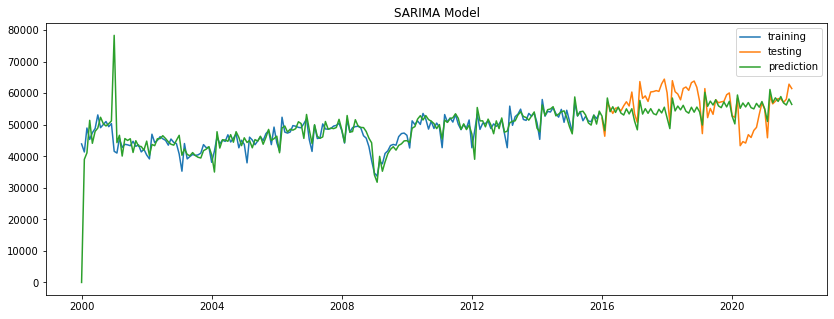

Model Mean Absolute Percentage Error on training data is 4.58%
Model Mean Absolute Percentage Error on testing data is 7.30%
RMSE =  5145.877007555354


In [58]:
# D.Imports Type
# SARIMAX model
from statsmodels.tsa.statespace.sarimax import SARIMAX
sarima_model = SARIMAX(train['D.Imports'], order=(3, 1, 3),seasonal_order=(3, 1, 3, 12)).fit()
pred = sarima_model.get_prediction(start='2000-01-01', end='2021-11-01').predicted_mean
fig, ax = plt.subplots(figsize=(14, 5))
ax.plot(train['D.Imports'], label='training')
ax.plot(test['D.Imports'], label='testing')
ax.plot(pred, label='prediction')
plt.legend()
plt.title('SARIMA Model')
plt.show()
# To evaluate the auto arima model
from sklearn.metrics import mean_absolute_percentage_error
mape_train = mean_absolute_percentage_error(train['D.Imports'], pred[pred.index<'2016-01-01'])
mape_test = mean_absolute_percentage_error(test['D.Imports'], pred[pred.index>='2016-01-01'])
RMSE=np.sqrt(mean_squared_error(pred[pred.index>='2016-01-01'],test['D.Imports']))
print(f'Model Mean Absolute Percentage Error on training data is {mape_train*100:.2f}%')
print(f'Model Mean Absolute Percentage Error on testing data is {mape_test*100:.2f}%')
print('RMSE = ',RMSE)

In [59]:
sarima_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                          D.Imports   No. Observations:                  192
Model:             SARIMAX(3, 1, 3)x(3, 1, 3, 12)   Log Likelihood               -1630.512
Date:                            Thu, 11 Aug 2022   AIC                           3287.023
Time:                                    21:27:49   BIC                           3328.459
Sample:                                01-01-2000   HQIC                          3303.825
                                     - 12-01-2015                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0857      1.013      0.085      0.933      -1.901       2.072
ar.L2          0.0870      0.873      0.100      0.921      -1.624       1.798
ar.L3          0.5162      0.759      0.680      0.497      -0.972       2.004
ma.L1         -0.2231      1.007     -0.221      0.825      -2.197       1.751
ma.L2         -0.0622      0.817     -0.076      0.939      -1.663       1.538
ma.L3         -0.4105      0.686     -0.598      0.550      -1.755       0.934
ar.S.L12      -1.0107      0.292     -3.461      0.001      -1.583      -0.438
ar.S.L24      -0.5440      0.282     -1.929      0.054      -1.097       0.009
ar.S.L36       0.3104      0.128      2.424      0.015       0.059       0.561
ma.S.L12       0.5759      0.329      1.751      0.080      -0.069       1.221
ma.S.L24       0.0171      0.228      0.075      0.940      -0.429       0.463
ma.S.L36      -0.6732      0.172     -3.907      0.000      -1.011      -0.335
sigma2      5.888e+06   2.76e-07   2.13e+13      0.000    5.89e+06    5.89e+06
===================================================================================
Ljung-Box (Q):                       51.66   Jarque-Bera (JB):                35.14
Prob(Q):                              0.10   Prob(JB):                         0.00
Heteroskedasticity (H):               0.88   Skew:                             0.30
Prob(H) (two-sided):                  0.62   Kurtosis:                         5.08
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.39e+30. Standard errors may be unstable.
"""

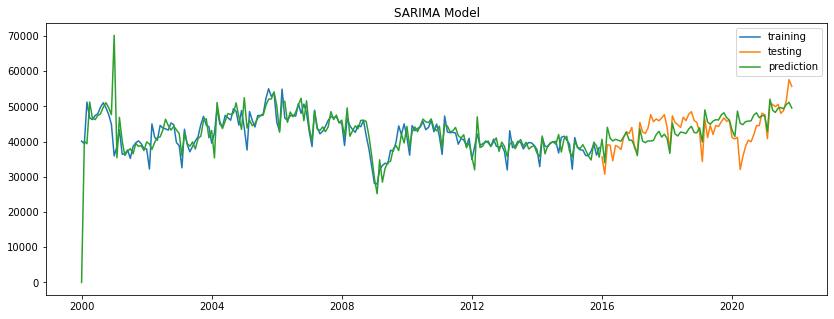

Model Mean Absolute Percentage Error on training data is 5.61%
Model Mean Absolute Percentage Error on testing data is 7.58%
RMSE =  3965.648428873047


In [60]:
# D.Exports Type
# SARIMAX model
from statsmodels.tsa.statespace.sarimax import SARIMAX
sarima_model = SARIMAX(train['D.Exports'], order=(0, 1, 0),seasonal_order=(3, 1, 3, 12)).fit()
pred = sarima_model.get_prediction(start='2000-01-01', end='2021-11-01').predicted_mean
fig, ax = plt.subplots(figsize=(14, 5))
ax.plot(train['D.Exports'], label='training')
ax.plot(test['D.Exports'], label='testing')
ax.plot(pred, label='prediction')
plt.legend()
plt.title('SARIMA Model')
plt.show()
# To evaluate the auto arima model
from sklearn.metrics import mean_absolute_percentage_error
mape_train = mean_absolute_percentage_error(train['D.Exports'], pred[pred.index<'2016-01-01'])
mape_test = mean_absolute_percentage_error(test['D.Exports'], pred[pred.index>='2016-01-01'])
RMSE=np.sqrt(mean_squared_error(pred[pred.index>='2016-01-01'],test['D.Exports']))
print(f'Model Mean Absolute Percentage Error on training data is {mape_train*100:.2f}%')
print(f'Model Mean Absolute Percentage Error on testing data is {mape_test*100:.2f}%')
print('RMSE = ',RMSE)

In [61]:
sarima_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                         SARIMAX Results                                          
==================================================================================================
Dep. Variable:                                  D.Exports   No. Observations:                  192
Model:             SARIMAX(0, 1, 0)x(3, 1, [1, 2, 3], 12)   Log Likelihood               -1654.354
Date:                                    Thu, 11 Aug 2022   AIC                           3322.709
Time:                                            21:28:09   BIC                           3345.020
Sample:                                        01-01-2000   HQIC                          3331.756
                                             - 12-01-2015                                         
Covariance Type:                                      opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L12      -0.8429      0.141     -5.981      0.000      -1.119      -0.567
ar.S.L24      -0.3381      0.137     -2.468      0.014      -0.607      -0.070
ar.S.L36       0.4789      0.068      7.079      0.000       0.346       0.611
ma.S.L12       0.2977      3.918      0.076      0.939      -7.381       7.977
ma.S.L24      -0.3022      3.858     -0.078      0.938      -7.864       7.260
ma.S.L36      -0.9955      0.154     -6.468      0.000      -1.297      -0.694
sigma2      4.954e+06   1.78e-06   2.79e+12      0.000    4.95e+06    4.95e+06
===================================================================================
Ljung-Box (Q):                       56.34   Jarque-Bera (JB):                10.14
Prob(Q):                              0.04   Prob(JB):                         0.01
Heteroskedasticity (H):               0.54   Skew:                             0.17
Prob(H) (two-sided):                  0.02   Kurtosis:                         4.12
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 9.07e+28. Standard errors may be unstable.
"""

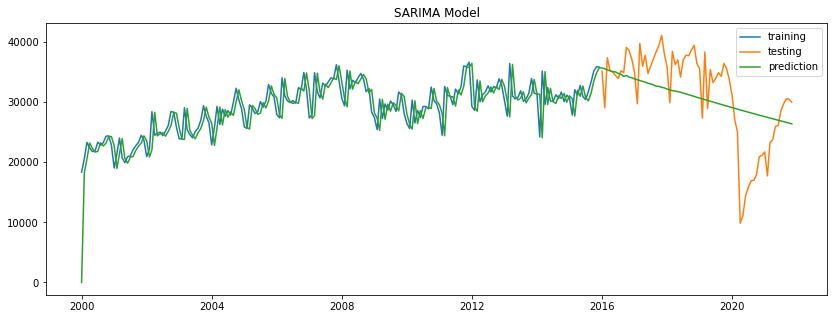

Model Mean Absolute Percentage Error on training data is 7.09%
Model Mean Absolute Percentage Error on testing data is 21.58%
RMSE =  6264.798137146956


In [66]:
# T.Imports Type
# SARIMAX model
from statsmodels.tsa.statespace.sarimax import SARIMAX
sarima_model = SARIMAX(train['T.Imports'], order=(1, 0, 0),seasonal_order=(1, 0, 0, 31)).fit()
pred = sarima_model.get_prediction(start='2000-01-01', end='2021-11-01').predicted_mean
fig, ax = plt.subplots(figsize=(14, 5))
ax.plot(train['T.Imports'], label='training')
ax.plot(test['T.Imports'], label='testing')
ax.plot(pred, label='prediction')
plt.legend()
plt.title('SARIMA Model')
plt.show()
# To evaluate the auto arima model
from sklearn.metrics import mean_absolute_percentage_error
mape_train = mean_absolute_percentage_error(train['T.Imports'], pred[pred.index<'2016-01-01'])
mape_test = mean_absolute_percentage_error(test['T.Imports'], pred[pred.index>='2016-01-01'])
RMSE=np.sqrt(mean_squared_error(pred[pred.index>='2016-01-01'],test['T.Imports']))
print(f'Model Mean Absolute Percentage Error on training data is {mape_train*100:.2f}%')
print(f'Model Mean Absolute Percentage Error on testing data is {mape_test*100:.2f}%')
print('RMSE = ',RMSE)

In [67]:
sarima_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                          T.Imports   No. Observations:                  192
Model:             SARIMAX(1, 0, 0)x(1, 0, 0, 31)   Log Likelihood               -1786.777
Date:                            Thu, 11 Aug 2022   AIC                           3579.554
Time:                                    21:29:03   BIC                           3589.326
Sample:                                01-01-2000   HQIC                          3583.512
                                     - 12-01-2015                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9956      0.006    156.854      0.000       0.983       1.008
ar.S.L31       0.0300      0.107      0.281      0.779      -0.180       0.240
sigma2      6.935e+06   2.89e-09    2.4e+15      0.000    6.94e+06    6.94e+06
===================================================================================
Ljung-Box (Q):                      363.94   Jarque-Bera (JB):                48.84
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               2.15   Skew:                             0.64
Prob(H) (two-sided):                  0.00   Kurtosis:                         5.12
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 6.14e+30. Standard errors may be unstable.
"""

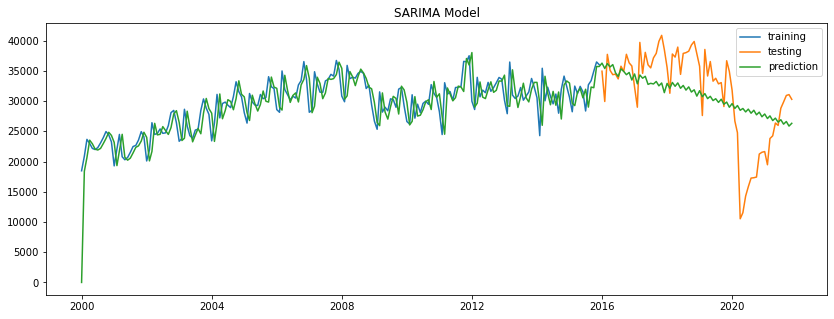

Model Mean Absolute Percentage Error on training data is 7.16%
Model Mean Absolute Percentage Error on testing data is 20.29%
RMSE =  6043.071286818193


In [64]:
# T.Exports Type
# SARIMAX model
from statsmodels.tsa.statespace.sarimax import SARIMAX
sarima_model = SARIMAX(train['T.Exports'], order=(2, 0, 1),seasonal_order=(1, 0, 0, 29)).fit()
pred = sarima_model.get_prediction(start='2000-01-01', end='2021-11-01').predicted_mean
fig, ax = plt.subplots(figsize=(14, 5))
ax.plot(train['T.Exports'], label='training')
ax.plot(test['T.Exports'], label='testing')
ax.plot(pred, label='prediction')
plt.legend()
plt.title('SARIMA Model')
plt.show()
# To evaluate the auto arima model
from sklearn.metrics import mean_absolute_percentage_error
mape_train = mean_absolute_percentage_error(train['T.Exports'], pred[pred.index<'2016-01-01'])
mape_test = mean_absolute_percentage_error(test['T.Exports'], pred[pred.index>='2016-01-01'])
RMSE=np.sqrt(mean_squared_error(pred[pred.index>='2016-01-01'],test['T.Exports']))
print(f'Model Mean Absolute Percentage Error on training data is {mape_train*100:.2f}%')
print(f'Model Mean Absolute Percentage Error on testing data is {mape_test*100:.2f}%')
print('RMSE = ',RMSE)

In [65]:
sarima_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                           T.Exports   No. Observations:                  192
Model:             SARIMAX(2, 0, 1)x(1, 0, [], 29)   Log Likelihood               -1785.721
Date:                             Thu, 11 Aug 2022   AIC                           3581.442
Time:                                     21:28:44   BIC                           3597.729
Sample:                                 01-01-2000   HQIC                          3588.038
                                      - 12-01-2015                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0032      0.025     -0.126      0.899      -0.053       0.046
ar.L2          0.9917      0.023     43.917      0.000       0.947       1.036
ma.L1          0.9786      0.061     16.100      0.000       0.859       1.098
ar.S.L29       0.2024      0.075      2.706      0.007       0.056       0.349
sigma2      6.175e+06    4.7e-09   1.31e+15      0.000    6.17e+06    6.17e+06
===================================================================================
Ljung-Box (Q):                      402.36   Jarque-Bera (JB):                14.01
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               1.89   Skew:                             0.36
Prob(H) (two-sided):                  0.01   Kurtosis:                         4.11
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.93e+30. Standard errors may be unstable.
"""

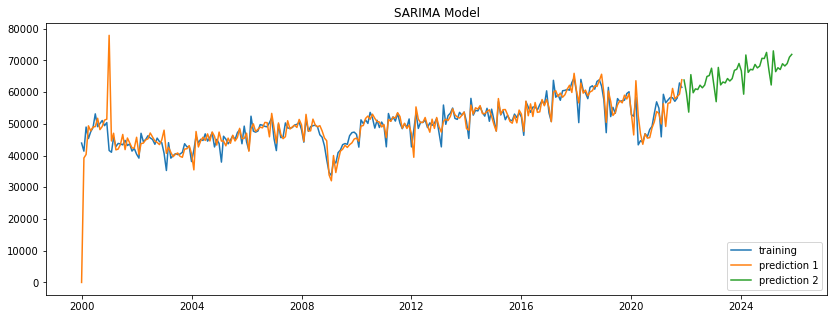

In [14]:
#O3 Gas
from statsmodels.tsa.statespace.sarimax import SARIMAX
#Define Train & Test Data
train_data = df['D.Imports']

#SARIMAX model
sarima_model = SARIMAX(train_data, order=(3, 1, 3),seasonal_order=(3, 1, 3, 12)).fit()
pred1 = sarima_model.get_prediction(start='2000-01-01', end='2021-11-01').predicted_mean
pred2 = sarima_model.get_prediction(start='2021-11-02', end='2025-11-01').predicted_mean

#Plot
fig, ax = plt.subplots(figsize=(14, 5))
ax.plot(train_data, label='training')
ax.plot(pred1, label='prediction 1')
ax.plot(pred2, label='prediction 2')
plt.legend()
plt.title('SARIMA Model')
plt.show()

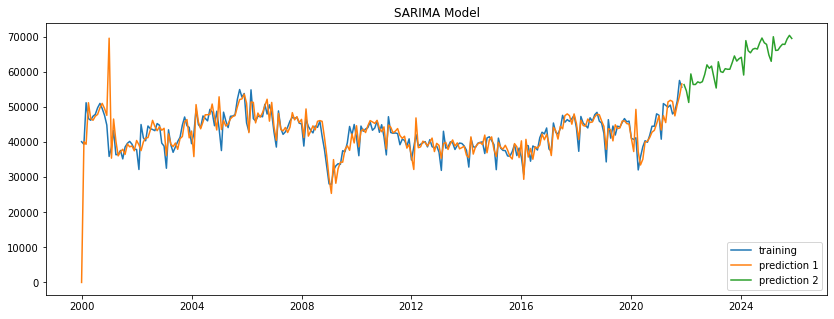

In [16]:
#O3 Gas
from statsmodels.tsa.statespace.sarimax import SARIMAX
#Define Train & Test Data
train_data = df['D.Exports']

#SARIMAX model
sarima_model = SARIMAX(train_data, order=(0, 1, 0),seasonal_order=(3, 1, 3, 12)).fit()
pred1 = sarima_model.get_prediction(start='2000-01-01', end='2021-11-01').predicted_mean
pred2 = sarima_model.get_prediction(start='2021-11-02', end='2025-11-01').predicted_mean

#Plot
fig, ax = plt.subplots(figsize=(14, 5))
ax.plot(train_data, label='training')
ax.plot(pred1, label='prediction 1')
ax.plot(pred2, label='prediction 2')
plt.legend()
plt.title('SARIMA Model')
plt.show()